## 데이터 로드

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score , recall_score , precision_score , roc_curve , auc , accuracy_score , r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 

In [470]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import r2_score 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

train = pd.read_csv('./Data/예측 data/train.csv')
test = pd.read_csv('./Data/예측 data/test.csv')
train.shape , test.shape 

((10886, 12), (6493, 9))

In [471]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [472]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: xlabel='workingday'>

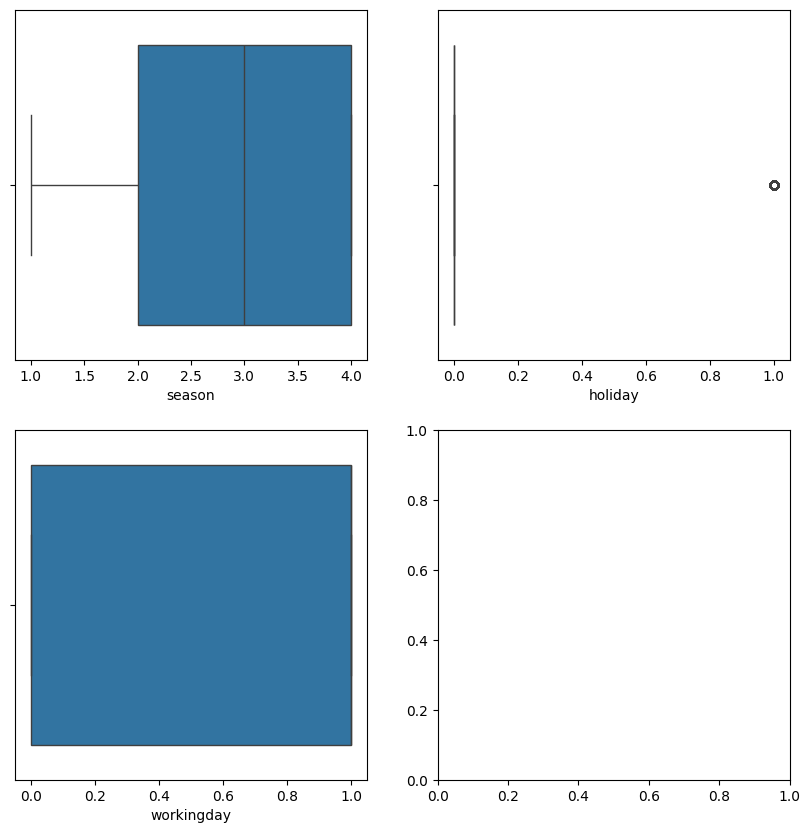

In [473]:
fig , axes = plt.subplots(2,2,figsize=[10,10])
sns.boxplot(x='season',data=train,ax=axes[0,0])
sns.boxplot(x='holiday',data=train,ax=axes[0,1])
sns.boxplot(x='workingday',data=train,ax=axes[1,0])

In [381]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [382]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 시각화

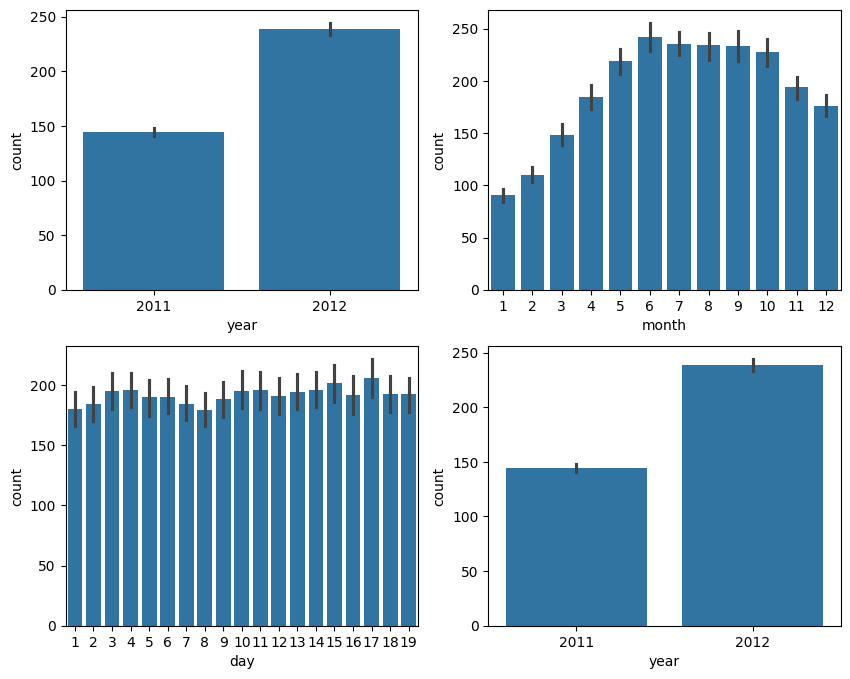

In [395]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10,8])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year', y='count',data=train)

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='year',y='count',data=train)

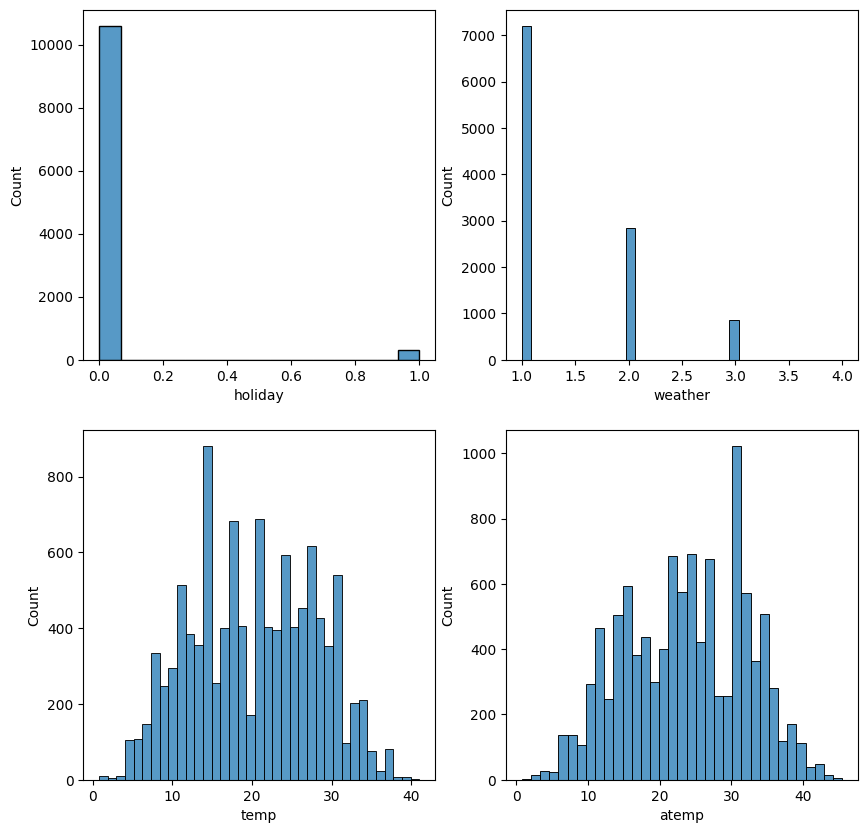

In [396]:
fig = plt.figure(figsize=[10,10])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.histplot(x='holiday',data=train) 

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.histplot(x='weather',data=train)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.histplot(x='temp',data=train)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.histplot(x='atemp',data=train)

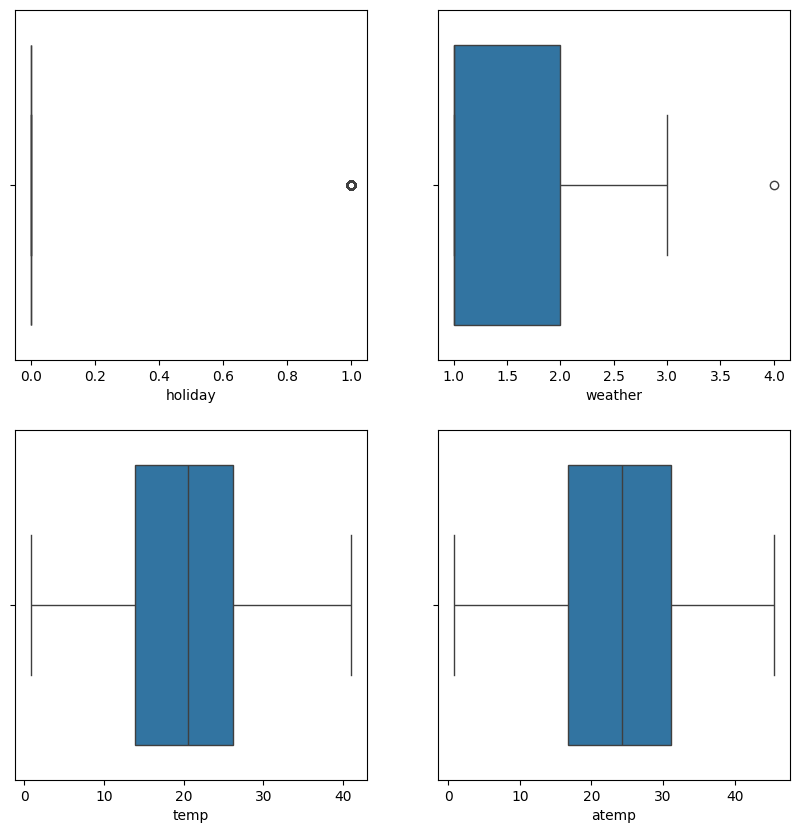

In [397]:
fig = plt.figure(figsize=[10,10])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.boxplot(x='holiday',data=train) 

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.boxplot(x='weather',data=train)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.boxplot(x='temp',data=train)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.boxplot(x='atemp',data=train)

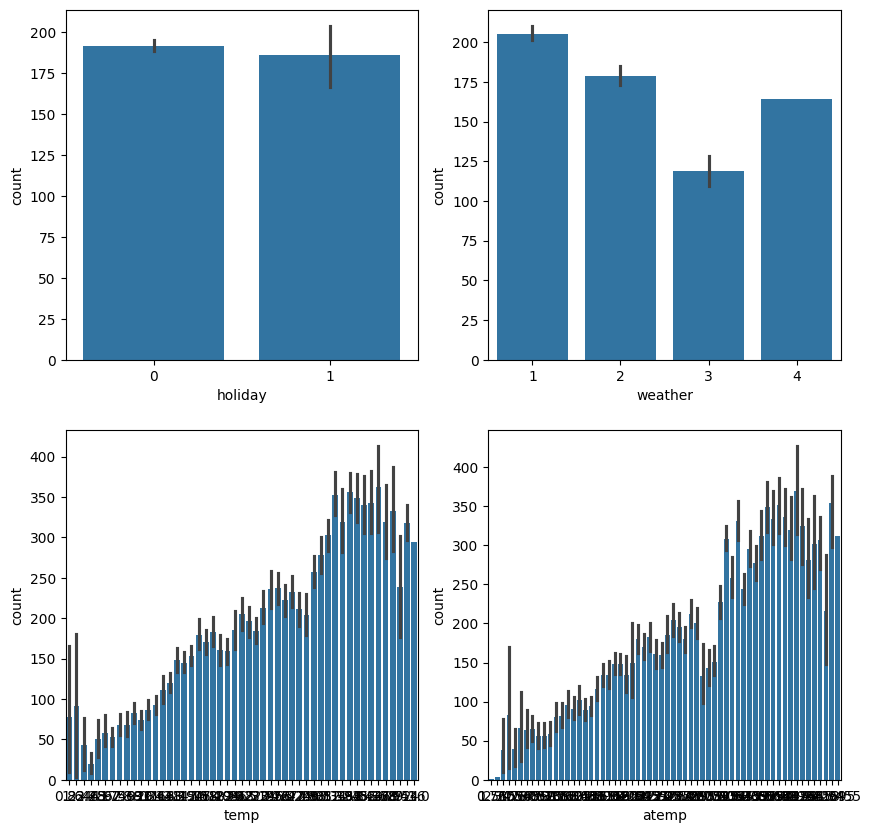

In [398]:
fig = plt.figure(figsize=[10,10])

ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='holiday',y='count',data=train) 

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='weather',y='count',data=train)

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='temp',y='count',data=train)

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='atemp',y='count',data=train)

<Axes: >

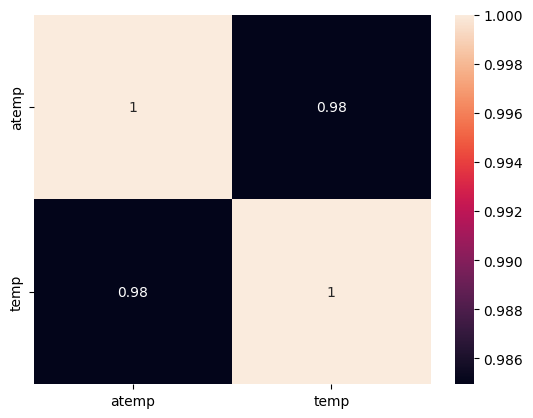

In [399]:
corr_data = train[['atemp','temp']]
sns.heatmap(corr_data.corr(),annot=True)

In [481]:
train['datetime'].apply(lambda x : x.split(' ')[0].split('-')[0])

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: object

## 전처리 시작

In [390]:
train['datetime'] = train['datetime'].apply(lambda x:x.split())
test['datetime'] = test['datetime'].apply(lambda x:x.split())

In [391]:
train['year'] = train['datetime'].apply(lambda x: x[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x[1].split(':')[0])

test['year'] = test['datetime'].apply(lambda x: x[0].split('-')[0])
test['month'] = test['datetime'].apply(lambda x: x[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x: x[0].split('-')[2])
test['hour'] = test['datetime'].apply(lambda x : x[1].split(':')[0])

In [392]:
train['year'] = train['year'].astype(int)
train['month'] = train['month'].astype(int)
train['day'] = train['day'].astype(int)
train['hour'] = train['hour'].astype(int)
test['year'] = test['year'].astype(int)
test['month'] = test['month'].astype(int)
test['day'] = test['day'].astype(int)
test['hour'] = test['hour'].astype(int)

In [393]:
train.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

<Axes: >

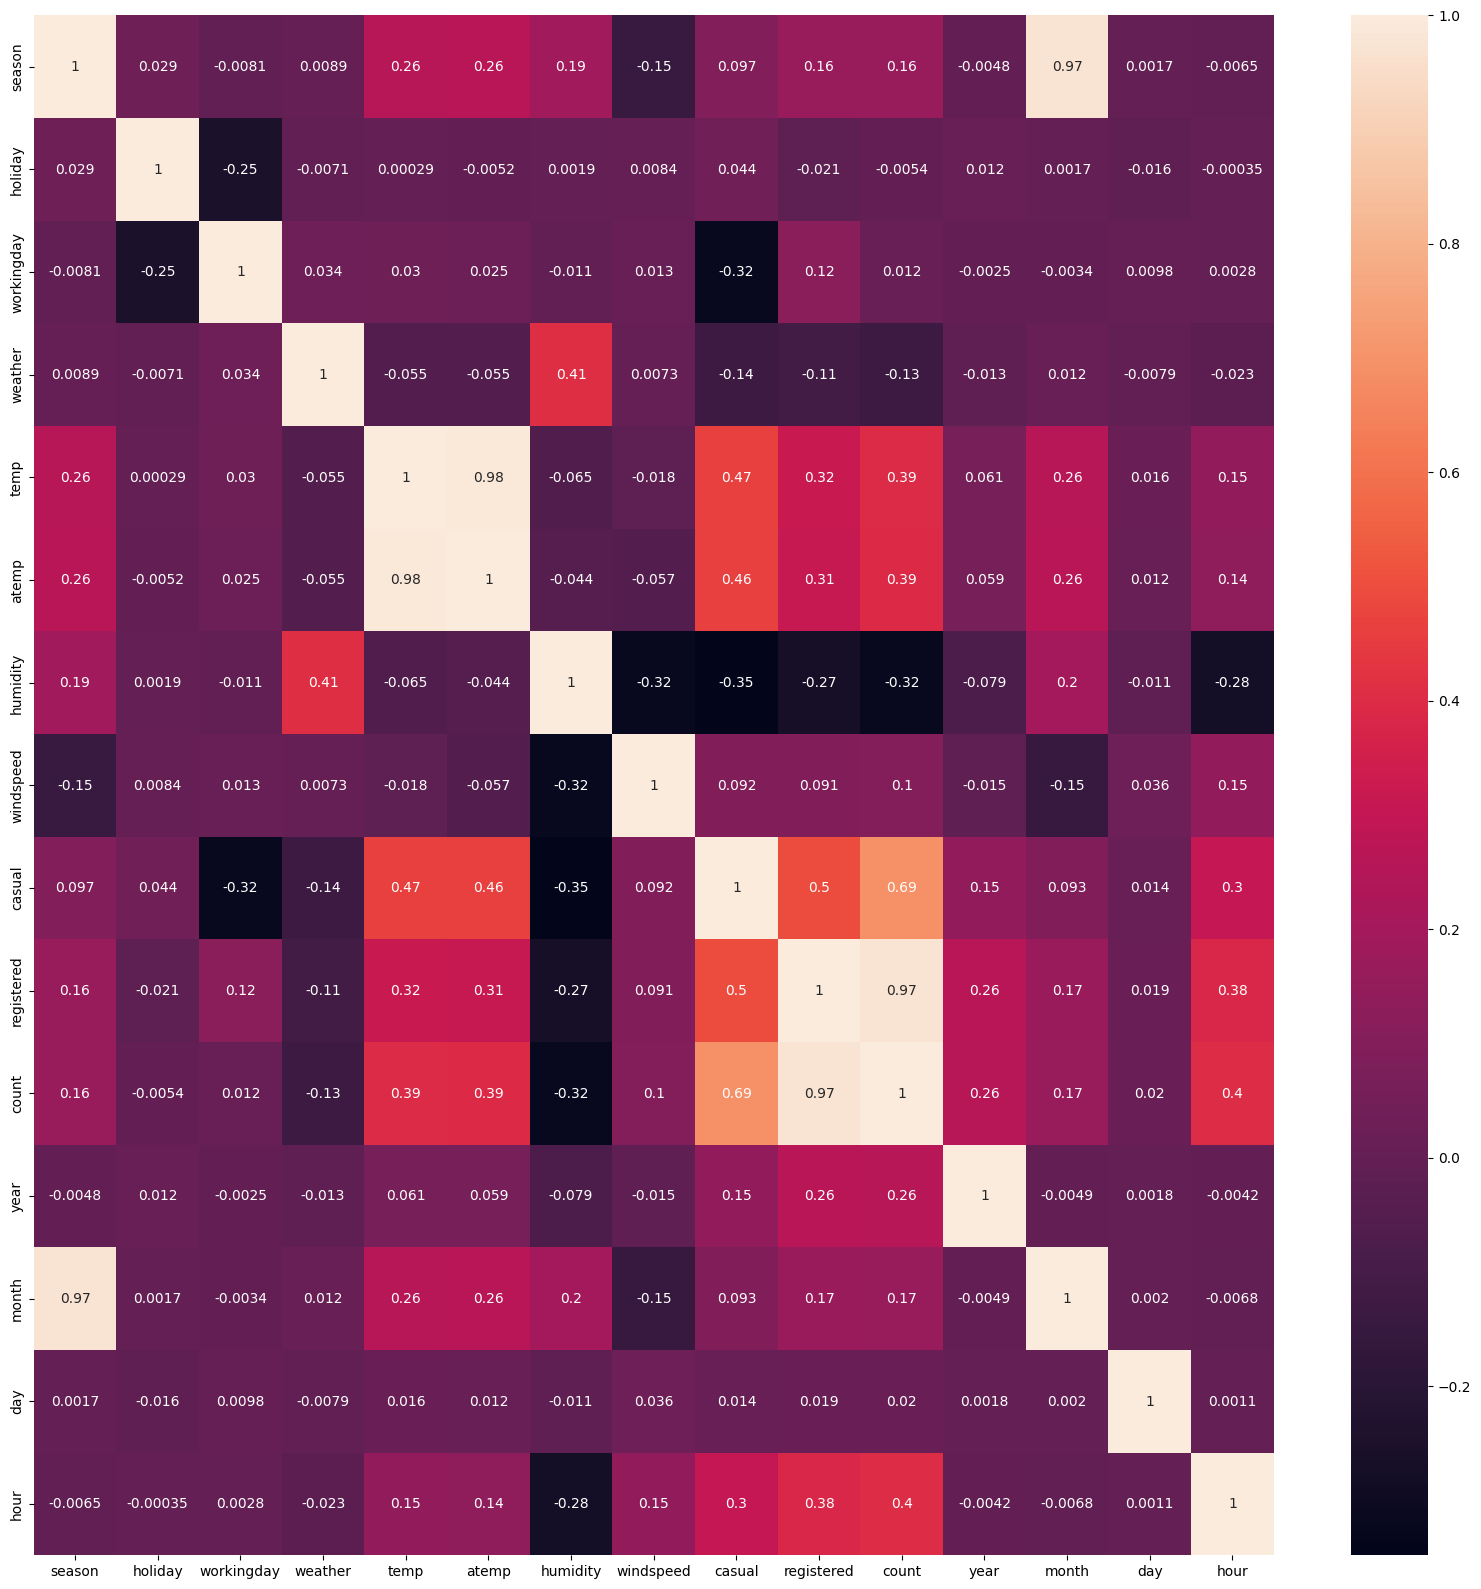

In [394]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20,20])
sns.heatmap(train.corr(),annot=True)

<Axes: xlabel='hour', ylabel='count'>

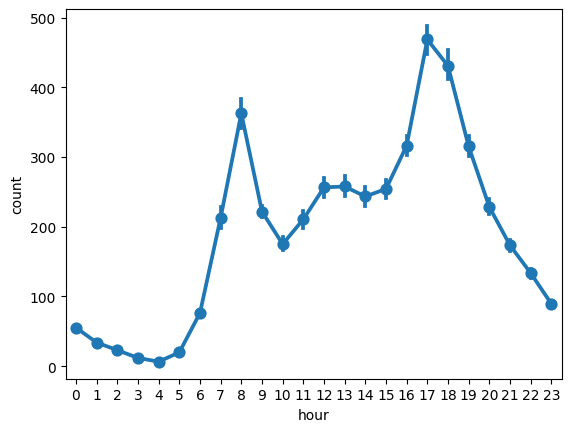

In [401]:
sns.pointplot(x='hour',y='count',data=train)

In [402]:
def hour_level(hour):
    if hour >20 or hour <6:
        return 'low_hour'
    else:
        return 'not low_hour'
    
train['new_hour'] = train['hour'].apply(hour_level)
test['new_hour'] = test['hour'].apply(hour_level)

In [403]:
train['count_log'] = train['count'].apply(lambda x : np.log(x) if x>0 else 0)

In [404]:
category_col = train.select_dtypes(include='object').columns
category_col

Index(['new_hour'], dtype='object')

In [405]:
train = pd.get_dummies(train,columns=category_col)
test = pd.get_dummies(test,columns=category_col)

In [406]:
train.replace([True , False] , [1,0],inplace=True)
test.replace([True , False] , [1,0],inplace=True)

In [410]:
train_copy = train.copy()
test_copy = test.copy()
train_copy.shape , test_copy.shape

((10886, 18), (6493, 14))

## 데이터 분리 

In [411]:
col = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'new_hour_low_hour', 'new_hour_not low_hour']

In [437]:
X = train[col].values
y = train['count_log'].values

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=256)

In [438]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((7620, 14), (3266, 14), (7620,), (3266,))

## 학습 및 평가

In [440]:
from sklearn.ensemble import GradientBoostingRegressor
model_DT = GradientBoostingRegressor()
model_DT.fit(X_train,y_train)

pred_train = model_DT.predict(X_train)
pred_test = model_DT.predict(X_test)

r2_score(pred_train,y_train) , r2_score(pred_test,y_test)

(0.9102818465343561, 0.8970803273807617)

In [441]:
importances_values = model_DT.feature_importances_
importances = pd.Series(importances_values, index=test.columns)
importances.sort_values(ascending=False).index[:10]

Index(['hour', 'workingday', 'month', 'temp', 'year', 'new_hour_not low_hour',
       'new_hour_low_hour', 'humidity', 'atemp', 'weather'],
      dtype='object')

In [442]:
col = ['hour', 'workingday', 'month', 'temp', 'year', 'new_hour_not low_hour',
       'new_hour_low_hour', 'humidity', 'atemp', 'weather']

In [443]:
X = train[col].values
y = train['count_log'].values

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=256)

from sklearn.ensemble import GradientBoostingRegressor
model_DT = GradientBoostingRegressor()
model_DT.fit(X_train,y_train)

pred_train = model_DT.predict(X_train)
pred_test = model_DT.predict(X_test)

r2_score(pred_train,y_train) , r2_score(pred_test,y_test)

(0.9098860306368883, 0.8964083653278521)

In [444]:
test = test[col]

In [455]:
final_pred = model_DT.predict(test)
submission = pd.DataFrame(final_pred).reset_index().rename({0:'count'},axis=1)
submission['Count'] = submission['count'].apply(lambda x : np.exp(x))
submission

c:\Users\User\document\etc study\studyvenv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


,index,count,Count
0,0,2.257941,9.563373
1,1,1.630921,5.108578
2,2,1.088492,2.969793
3,3,0.778233,2.177621
4,4,0.765875,2.150876
...,...,...,...
6488,6488,5.687600,295.184324
6489,6489,5.460387,235.188398
6490,6490,4.954341,141.789096
6491,6491,4.829263,125.118755


## kfold 해보기

In [183]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

n_iter = 0

kfold = KFold(n_splits=10)

cv_r2_score_train = []
cv_r2_score_val = []
kf_model =  DecisionTreeClassifier()

for train_idx , val_idx in kfold.split(X,y):
    X_train , X_val = X.iloc[train_idx] , X.iloc[val_idx]
    y_train , y_val = y.iloc[train_idx] , y.iloc[val_idx]
    
    kf_model.fit(X_train,y_train)
    
    kf_predict_train = kf_model.predict(X_train)
    kf_predict_val = kf_model.predict(X_val)
    
    n_iter +=1
    kf_r2_train = r2_score(y_train,kf_predict_train)
    kf_r2_val = r2_score(y_val,kf_predict_val)
    
    
    print(f'{n_iter}번 train 교차 검증 정확도{kf_r2_train},test 교차 검증 정확도{kf_r2_val}')
    
    cv_r2_score_train.append(kf_r2_train)
    cv_r2_score_val.append(kf_r2_val)
    
print('train 평균 정확도',np.mean(cv_r2_score_train))
print('test 평균 정확도',np.mean(cv_r2_score_val))

1번 train 교차 검증 정확도1.0,test 교차 검증 정확도-1.1643039381426226
2번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.5121704792144399
3번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.7770214438072773
4번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.817777485933282
5번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.3484470107818909
6번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.23904687398409985
7번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.5512812806529903
8번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.6534743078873686
9번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.750208265990237
10번 train 교차 검증 정확도1.0,test 교차 검증 정확도0.5274657118744877
train 평균 정확도 1.0
test 평균 정확도 0.40125889219834504
